## Six Simple Steps to Plotting Correlation Matrix in Python

In [1]:
#Language:    Python
#Platform:    Jupyter Notebook (IPython)
#Creator:     Sulaimon A. Afolabi
#Affiliation: University of the Witwatersrand, Johannesburg
#Repository:  github.com/afolaborn
#Email:       afolaborn[at]gmail.com
#Linkedin:    linkedin.com/in/sulaimonafolabiza

### Introduction

Correlation is a technique that is often employed both in the field of Statistics and machine learning to evaluate the strength and direction of association or relationship between two variables. The variables in question can be two independent variables or dependent-independent variables. Performing correlation analysis on the former is essential to control for inter-dependency or multicollinearity between independent variables. The resultant correlation value can fall between -1 and +1. Note that your data must be continuous.

![Correlation diagram](Correlation_Coefficent.png "Title")

### Learning Objectives

At the end of this tutorial, you will be able to do the following: 
1. Have an understanding of correlation;
2. Learn certain commands in python;
3. Prepare you data for analysis;
4. Compute the correlation coefficient;
5. Graph the correlation matrix <br>
Note: Every command starting with # sign are comments (will not be run). 

### Step #1 - Import the necessary modules & check python version 

In [9]:
import os                            ## Operating system related task  
import sys                           ## Checking the current version of python etc 
import pandas as pd                  ## Loading the daset
import numpy as np                   ## Array creation 
import urllib                        ## Retrieving data on the web  
import matplotlib.pyplot as plt      ## creating charts e.g. histogram
import seaborn as sns                ## Creating charts  
%matplotlib inline                   

In [118]:
print('Python version ' + sys.version)

Python version 2.7.12 |Anaconda 4.1.1 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


### Step #2 - Checking & Changing the Default Directory


In [5]:
cwd = os.getcwd()
print(cwd)

C:\Anaconda2\11_Correlation


In [12]:
#The command below with change the current directory
#Not necessary in my case
os.chdir(r"C:\Anaconda2\11_Correlation")
print(os.getcwd())

C:\Anaconda2\11_Correlation


### Step #3  Download, Convert, Read  & View the Dataset

In [ ]:
# Step 3a Download
# Dowload the data from the specified address
# urllib.urlretrieve ("web address", "Your name for the dataset")

In [22]:
urllib.urlretrieve ("http://www.stata-press.com/data/r14/auto.dta", "SampleData.dta")
#After running this, you will find the data in your directory. Note that the speed matter.
## .dta is a stata extension

('SampleData.dta', <httplib.HTTPMessage instance at 0x000000000C3944C8>)

In [17]:
# 3b Covert
#Convert the data from stata to csv 
data = pd.io.stata.read_stata('SampleData.dta')
data.to_csv('SampleData.csv')

In [23]:
# 3c Read or Load the dataset
SampleData = pd.read_csv('SampleData.csv')

In [25]:
#  View the data
SampleData.head()

,Unnamed: 0,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


### Step #4  Information and Summary Statistics of Dataset

In [27]:
SampleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 13 columns):
Unnamed: 0      74 non-null int64
make            74 non-null object
price           74 non-null int64
mpg             74 non-null int64
rep78           69 non-null float64
headroom        74 non-null float64
trunk           74 non-null int64
weight          74 non-null int64
length          74 non-null int64
turn            74 non-null int64
displacement    74 non-null int64
gear_ratio      74 non-null float64
foreign         74 non-null object
dtypes: float64(3), int64(8), object(2)
memory usage: 7.6+ KB


In [ ]:
# Variable       Descriptiom 
# make           Make and Model
# price          Price of the car
# mpg            Mileage
# rep78          Repair record
# headroom       headroom (in.)
# trunk          Trunk space (cu. ft.)
# weight         Weight (lbs)
# length         Length (in.)
# turn           Turn circle (ft.)
# displacement   Displacement (cu. in.)
# gear_ratio     Gear Ratio
# foreign        Car ratio     

In [90]:
print(SampleData.describe())
#Naan means missing

              price        mpg      rep78   headroom      trunk       weight  \
count     74.000000  74.000000  69.000000  74.000000  74.000000    74.000000   
mean    6165.256757  21.297297   3.405797   2.993243  13.756757  3019.459459   
std     2949.495885   5.785503   0.989932   0.845995   4.277404   777.193567   
min     3291.000000  12.000000   1.000000   1.500000   5.000000  1760.000000   
25%     4220.250000  18.000000        NaN   2.500000  10.250000  2250.000000   
50%     5006.500000  20.000000        NaN   3.000000  14.000000  3190.000000   
75%     6332.250000  24.750000        NaN   3.500000  16.750000  3600.000000   
max    15906.000000  41.000000   5.000000   5.000000  23.000000  4840.000000   

           length       turn  displacement  gear_ratio  
count   74.000000  74.000000     74.000000   74.000000  
mean   187.932432  39.648649    197.297297    3.014865  
std     22.266340   4.399354     91.837219    0.456287  
min    142.000000  31.000000     79.000000    2.190

### Step 5 Remove columns with strings (i.e.text) & others

In [39]:
SampleData = SampleData.drop('make', 1)                # String or text variable
SampleData = SampleData.drop('foreign', 1)             # String or text variable
SampleData = SampleData.drop('Unnamed: 0', 1)          # Index of the dataset 1,2,3
SampleData = SampleData.drop('rep78', 1)               # Has missing but it will still work

In [93]:
SampleData.head()

,price,mpg,headroom,trunk,weight,length,turn,displacement,gear_ratio
0,4099,22,2.5,11,2930,186,40,121,3.58
1,4749,17,3.0,11,3350,173,40,258,2.53
2,3799,22,3.0,12,2640,168,35,121,3.08
3,4816,20,4.5,16,3250,196,40,196,2.93
4,7827,15,4.0,20,4080,222,43,350,2.41


### Step 5 Compute the Correlation Coeficient

In [94]:
correlation_Coeficient = SampleData.corr()

In [97]:
correlation_Coeficient

,price,mpg,headroom,trunk,weight,length,turn,displacement,gear_ratio
price,1.000000,-0.468597,0.114506,0.314332,0.538611,0.431831,0.309617,0.494943,-0.313661
mpg,-0.468597,1.000000,-0.413803,-0.581585,-0.807175,-0.795779,-0.719186,-0.705643,0.616177
headroom,0.114506,-0.413803,1.000000,0.662011,0.483456,0.516295,0.424465,0.474491,-0.377852
trunk,0.314332,-0.581585,0.662011,1.000000,0.672206,0.726596,0.601059,0.608635,-0.508665
weight,0.538611,-0.807175,0.483456,0.672206,1.000000,0.946009,0.857443,0.894896,-0.759258
length,0.431831,-0.795779,0.516295,0.726596,0.946009,1.000000,0.864261,0.835140,-0.696383
turn,0.309617,-0.719186,0.424465,0.601059,0.857443,0.864261,1.000000,0.776765,-0.676300
displacement,0.494943,-0.705643,0.474491,0.608635,0.894896,0.835140,0.776765,1.000000,-0.828877
gear_ratio,-0.313661,0.616177,-0.377852,-0.508665,-0.759258,-0.696383,-0.676300,-0.828877,1.000000


### Step 6  Plotting the Correlation Matrix

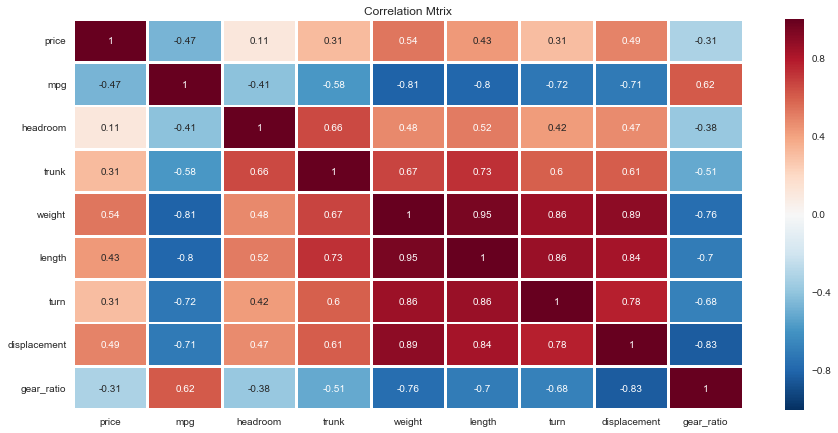

In [116]:
f, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(correlation_Coeficient,linewidths=2.0, ax=ax , annot=True)
ax.set_title('Correlation Mtrix')

### Interpretation Hint

![Correlation diagram](Correlation_Coefficent.png "Title")

If you like this tutorial, please click on "like" via my liknkedin account https://www.linkedin.com/in/sulaimonafolabiza. If you have a github account, click the relevant button to give it a star.